# Implementacja

### Importowanie bibliotek i własnego generatora

In [107]:

# from custom_random import rand
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

from generator import Generator

### Zmienne Stałe, Globalne

#### Parametry sygnału i zakres

In [108]:

CZAS_TRWANIA = 10  # sekundy
CZESTOTLIWOSC_PROBKOWANIA = 10000  # Hz

ZAKRES = (5, 10) # Liczby rzeczywiste

#### Obliczanie czasu trawania i generowanie szumu białego

In [109]:

LICZBA_PROBEK = CZAS_TRWANIA * CZESTOTLIWOSC_PROBKOWANIA
print(f"Liczba próbek {LICZBA_PROBEK}")

#Stwórz obiket Generator
gen = Generator()
szum_bialy = gen.uniform(ZAKRES[0], ZAKRES[1], LICZBA_PROBEK)

# Gotowy generator
#szum_bialy = np.random.uniform(ZAKRES[0], ZAKRES[1], LICZBA_PROBEK)

Liczba próbek 100000


### Wykresy

#### Wykres czasowy szumu białego o rozkładzie równomiernym

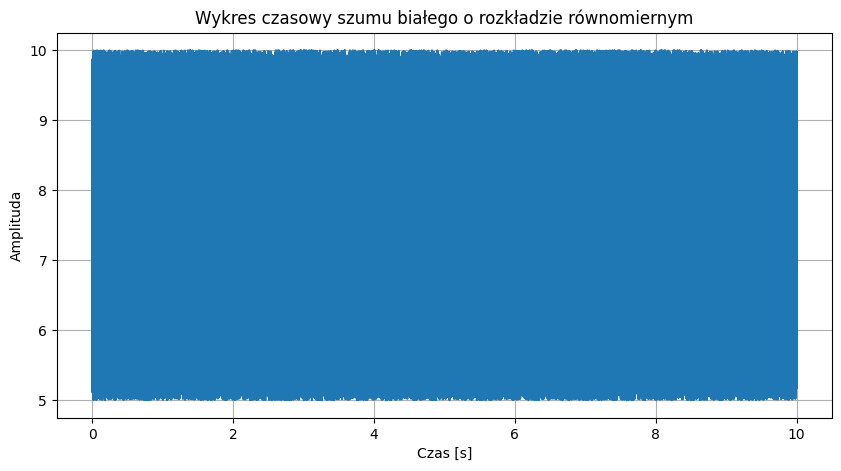

In [110]:

czas = np.linspace(0, CZAS_TRWANIA, LICZBA_PROBEK)
plt.figure(figsize=(10, 5))
plt.plot(czas, szum_bialy)
plt.title('Wykres czasowy szumu białego o rozkładzie równomiernym')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

### Przybliżony wykres czasowy szumu białego

Liczba próbek 100


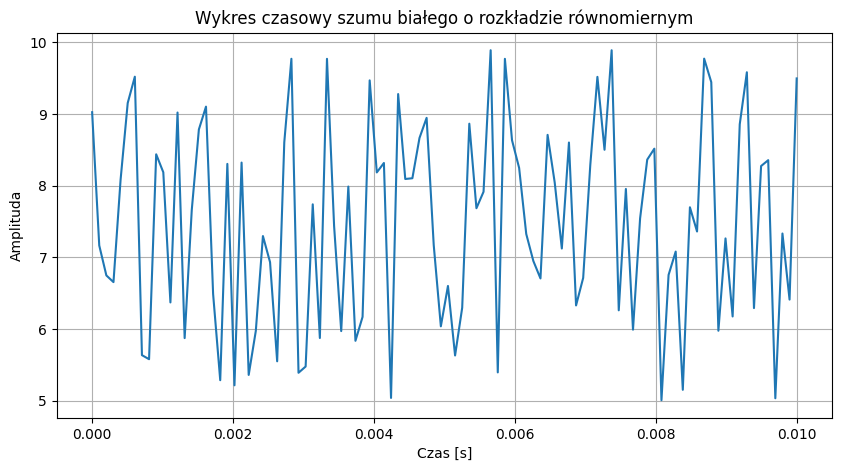

In [111]:

MALY_CZAS_TRWANIA = 0.01
MALA_LICZBA_PROBEK = int(MALY_CZAS_TRWANIA * CZESTOTLIWOSC_PROBKOWANIA)
print(f"Liczba próbek {MALA_LICZBA_PROBEK}")

maly_szum = gen.uniform(ZAKRES[0], ZAKRES[1], MALA_LICZBA_PROBEK)

maly_czas = np.linspace(0, MALY_CZAS_TRWANIA, MALA_LICZBA_PROBEK)
plt.figure(figsize=(10, 5))
plt.plot(maly_czas, maly_szum)
plt.title('Wykres czasowy szumu białego o rozkładzie równomiernym')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

### Histogram

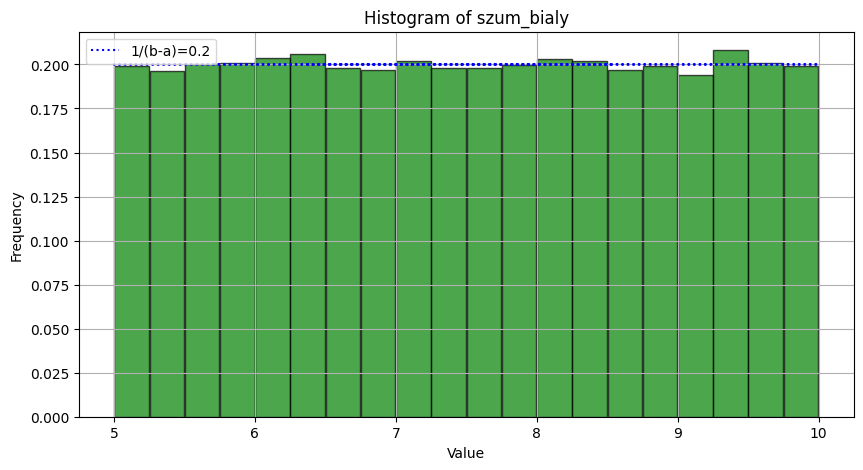

In [112]:
plt.figure(figsize=(10, 5))

x = np.linspace(ZAKRES[0], ZAKRES[1], 100)
plt.plot(szum_bialy, uniform.pdf(szum_bialy, loc=ZAKRES[0], scale=ZAKRES[1]-ZAKRES[0]), 'b', linestyle='dotted', label=f'1/(b-a)={1/(ZAKRES[1]-ZAKRES[0])}')


plt.hist(szum_bialy, bins=20, density=True, rwidth=0.98, color='g', edgecolor='black', alpha=0.7)
plt.title('Histogram of szum_bialy')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


### Gęstość prawdopodobieństwa

In [113]:
#x = np.linspace(ZAKRES[0], ZAKRES[1], 100)
#plt.plot(szum_bialy, uniform.pdf(szum_bialy, loc=ZAKRES[0], scale=ZAKRES[1]-ZAKRES[0]), 'b', label='1/(b-a)')
# Dodanie linii przerywanych na początku i końcu
#plt.vlines(ZAKRES[0], 0, uniform.pdf(ZAKRES[0], loc=ZAKRES[0], scale=ZAKRES[1] - ZAKRES[0]), colors='gray', linestyles='dashed')
#plt.vlines(ZAKRES[1], 0, uniform.pdf(ZAKRES[1], loc=ZAKRES[0], scale=ZAKRES[1] - ZAKRES[0]), colors='gray', linestyles='dashed')

#plt.legend()
#plt.grid(True)
#plt.show()

### Obliczanie dystrybuanty


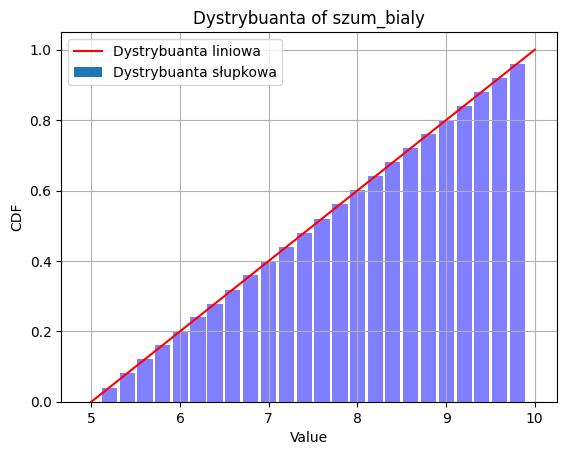

In [114]:
def wykresy_dystrybuanty(szum_bialy, liczba_slupkow=10, szerokosc_slupka=0.90):
    '''
    Funkcja generuje wykresy dystrybuanty dla szumu białego.
    :param szum_bialy: wygenerowany wcześniej szum biały
    :param liczba_slupkow: liczba słupków, domyślnie 10
    :param szerokosc_slupka: szerokość słupka, w przedziale 0.0 - 1.0 (domyślnie 0.9)
    :return: brak
    '''
    
    # Obliczanie dystrybuanty
    cdf_values = uniform.cdf(szum_bialy, loc=ZAKRES[0], scale=ZAKRES[1] - ZAKRES[0])
    
    # Obliczanie kroku dla słupków X
    ilosc_probek = len(szum_bialy)
    krok = int(ilosc_probek / liczba_slupkow)
 
    # Sortowanie danych
    sorted_data = np.sort(szum_bialy)
    sorted_cdf = np.sort(cdf_values)
    
    # Obliczanie szerokości słupków
    width = (sorted_data[krok] - sorted_data[0]) * szerokosc_slupka  # 80% szerokości między pierwszym a drugim słupkiem
 
    # Tworzenie wykresu słupkowego dystrybuanty
    for i in range(0, LICZBA_PROBEK, krok):
        plt.bar(sorted_data[i], sorted_cdf[i], width=width, color='b', alpha=0.5)
        
    # Dodanie labela dla wszystkich słupków
    plt.bar([], [], color='b', alpha=0.5, label='Dystrybuanta słupkowa')
 
    # Tworzenie wykresu liniowego dla dystrybuanty
    plt.plot(sorted_data, sorted_cdf, 'r', label='Dystrybuanta liniowa')
    
    plt.title('Dystrybuanta of szum_bialy')
    plt.xlabel('Value')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

wykresy_dystrybuanty(szum_bialy=szum_bialy, liczba_slupkow=25, szerokosc_slupka=0.85)

[0, 0.07565364024732789, 0.12606610522939152, 0.1761636294918828, 0.225715659820677, 0.27413568663321064, 0.32385383998077816, 0.37449673925516397, 0.42497427615384087, 0.4747922348580576, 0.5249234042163381, 0.5758989239158355, 0.6252138642540315, 0.6746414845438823, 0.7249320879750577, 0.7752905482050156, 0.8263351361127661, 0.8759463759071762, 0.9248738818146456, 1]



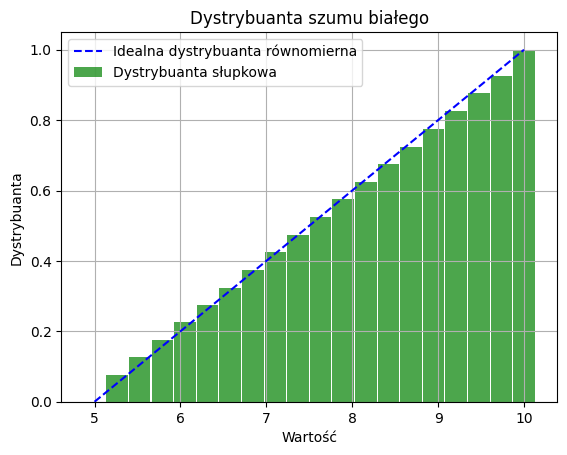

In [115]:
def avg(lst):
    return sum(lst) / len(lst)

def dystrybuanta_slupkowa(lista_probek, zakres, ilosc_slupkow=20):
    '''
    Funkcja generuje wykres dystrybuanty słupkowej dla szumu białego.
    :param ilosc_slupkow: liczba słupków, domyślnie 20
    '''
    probki = np.sort(lista_probek)
    
    # Obliczanie dystrybuanty
    cdf_values = uniform.cdf(probki, loc=zakres[0], scale=zakres[1] - zakres[0])
    sorted_cdf = np.sort(cdf_values)
    
    krok = int(len(probki) / ilosc_slupkow)
    
    # Obliczanie wartości dystrybuanty w środkach słupków
    wartosci_dystrybuanty = [avg(sorted_cdf[i:i+krok]) for i in range(0, len(sorted_cdf)-krok, krok)]
    if len(wartosci_dystrybuanty) < ilosc_slupkow:
        wartosci_dystrybuanty.append(1)
    else:
        wartosci_dystrybuanty[-1] = 1  # Ustawienie ostatniej wartości na 1
    wartosci_dystrybuanty[0] =0
    print(wartosci_dystrybuanty)
    
    print()
    # Tworzenie wykresu słupkowego dystrybuanty
    plt.bar(np.linspace(zakres[0], zakres[1], ilosc_slupkow), wartosci_dystrybuanty, width=(zakres[1] - zakres[0]) / ilosc_slupkow, color='g', alpha=0.7, label='Dystrybuanta słupkowa')
    
    # Dodanie referencyjnej, kropkowanej linii dla idealnej dystrybuanty dla rozkładu równomiernego
    idealne_probki = np.linspace(zakres[0], zakres[1], 1000)
    idealna_dystrybuanta = uniform.cdf(idealne_probki, loc=zakres[0], scale=zakres[1] - zakres[0])
    plt.plot(idealne_probki, idealna_dystrybuanta, 'b--', label='Idealna dystrybuanta równomierna')
        
    plt.title('Dystrybuanta szumu białego')
    plt.xlabel('Wartość')
    plt.ylabel('Dystrybuanta')
    plt.legend()
    plt.grid(True)
    plt.show()

#Stwórz obiket Generator
gen = Generator()
dystrybuanta_slupkowa(szum_bialy, ZAKRES, 20)


[0, 0.050251646885631475, 0.08418937161984343, 0.11768131890878103, 0.1510901365195276, 0.1845282702800171, 0.21751833869668966, 0.2500383153274704, 0.2821473164553301, 0.31541437833562735, 0.34914621862910716, 0.38285866592866497, 0.4168124994679081, 0.4495246434495911, 0.48317750185617164, 0.5164956041839033, 0.5503768403638678, 0.584195152522486, 0.6168875160449021, 0.6498885926519201, 0.6828145666195489, 0.716391613064691, 0.7502269020942626, 0.7834876608497279, 0.8177756051095184, 0.8515280400918902, 0.8838652605566674, 0.9164786929484793, 0.9499811045649377, 1]


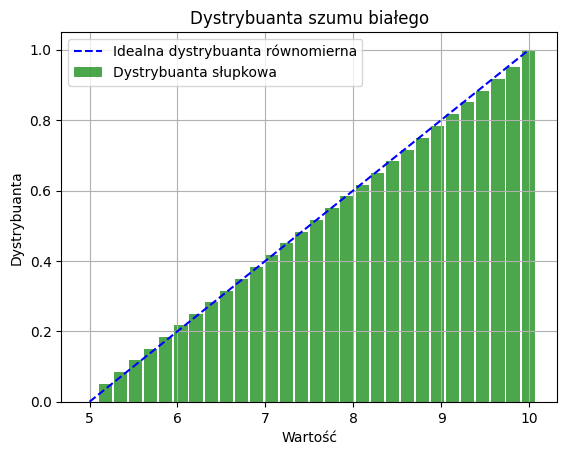

In [116]:
def dystrybuanta_slupkowa(lista_probek, zakres, ilosc_slupkow=20):
    '''
    Funkcja generuje wykres dystrybuanty słupkowej dla szumu białego.
    :param ilosc_slupkow: liczba słupków, domyślnie 20
    '''
    probki = np.sort(lista_probek)
    
    # Obliczanie dystrybuanty
    cdf_values = uniform.cdf(probki, loc=zakres[0], scale=zakres[1] - zakres[0])
    sorted_cdf = np.sort(cdf_values)
    
    krok = len(probki) // ilosc_slupkow
    
    # Obliczanie wartości dystrybuanty w środkach słupków
    wartosci_dystrybuanty = [avg(sorted_cdf[i:i+krok]) for i in range(0, len(sorted_cdf)-krok, krok)]
    if len(wartosci_dystrybuanty) < ilosc_slupkow:
        wartosci_dystrybuanty.append(1)
    else:
        wartosci_dystrybuanty[-1] = 1  # Ustawienie ostatniej wartości na 1
    wartosci_dystrybuanty[0] = 0
    print(wartosci_dystrybuanty)
    
    # Tworzenie wykresu słupkowego dystrybuanty
    plt.bar(np.linspace(zakres[0]+0.01, zakres[1]-0.01, ilosc_slupkow), wartosci_dystrybuanty, width=0.15, color='g', alpha=0.7, label='Dystrybuanta słupkowa')
    
    # Dodanie referencyjnej, kropkowanej linii dla idealnej dystrybuanty dla rozkładu równomiernego
    idealne_probki = np.linspace(zakres[0], zakres[1], 1000)
    idealna_dystrybuanta = uniform.cdf(idealne_probki, loc=zakres[0], scale=zakres[1] - zakres[0])
    plt.plot(idealne_probki, idealna_dystrybuanta, 'b--', label='Idealna dystrybuanta równomierna')
        
    plt.title('Dystrybuanta szumu białego')
    plt.xlabel('Wartość')
    plt.ylabel('Dystrybuanta')
    plt.legend()
    plt.grid(True)
    plt.show()

# Wywołanie funkcji
dystrybuanta_slupkowa(szum_bialy, ZAKRES, 30)

In [117]:
import pandas as pd

K = [10**2, 5*10**2, 10**3, 5*10**3, 10**4, 5*10**4, 10**5]

m_dash = [sum(n * 10 ** (-4) for n in range(1, k + 1)) / k for k in K]
#print(m_dash)

a_dash = [sum((n * 10 ** (-4))**2 - 2*(n * 10 ** (-4)*m_dash[i] + m_dash[i]**2) for n in range(1, k + 1)) / k for i, k in enumerate(K)]
#print(a_dash)

M = [k - 100 for k in K]
#print("-------------------------")
#print(M)

## tabel
K_t = ["K"] + K
m_t = ["m^"] + m_dash
a_t = ["a^"] + a_dash

M.pop(0)
m_dash.pop(0)
a_dash.pop(0)

z_dash = [sum((n * 10 ** (-4) - m_dash[i]) * ((n +100) * 10 ** (-4) - m_dash[i]) for n in range(1, m + 1)) / m for i, m in enumerate(M)]
#print(z_dash)

z_t = ["Z^"] + ["X"] + z_dash

tabela = [K_t, m_t, a_t, z_t]

# Tworzenie ramki danych
df = pd.DataFrame(tabela)

# Ustawianie odpowiednich właściwości stylu
df_styled = df.style.set_table_styles([
    {'selector': 'th', 'props': [('border', '1px solid black')]}, # Styl dla nagłówków
    {'selector': 'td', 'props': [('border', '1px solid black')]}, # Styl dla komórek
])

# Rysowanie stylizowanej tabeli w Jupyter Notebook
df_styled




,0,1,2,3,4,5,6,7
0,K,100,500.000000,1000.000000,5000.000000,10000.000000,50000.000000,100000.000000
1,m^,0.005050,0.025050,0.050050,0.250050,0.500050,2.500050,5.000050
2,a^,-0.000068,-0.001674,-0.006682,-0.166742,-0.666817,-16.667417,-66.668167
3,Z^,X,0.000108,0.000650,0.019983,0.081650,2.074983,8.316650


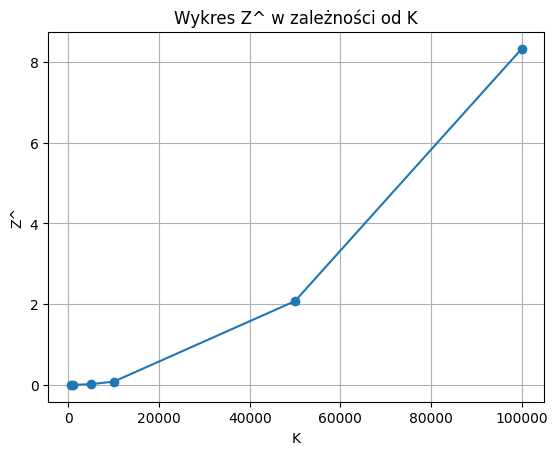

In [118]:
# Rysowanie wykresu
K.pop(0)
plt.plot(K, z_dash, marker='o')
plt.xlabel('K')
plt.ylabel('Z^')
plt.title('Wykres Z^ w zależności od K')
plt.grid(True)
plt.show()

# Filtracja


In [119]:
def oblicz_bk(fc, k_list, M, wk):
    '''
    Funkcja oblicza wartość współczynnika bk dla danego k.
    :param fc: częstotliwość odcięcia
    :param k: numer współczynnika
    :param M: długość filtra
    :param wk: wartość okna
    :return: wartość współczynnika bk
    '''
    bk = []
    for ik, k in enumerate(k_list):
        if k == (M - 1) / 2:
            bk.append(2 * np.pi * fc * wk[ik])
        else:
            bk.append(np.sin(2 * np.pi * fc * (k - (M - 1) / 2)) / (k - (M - 1) / 2) * wk[ik])
    return bk

M = 31
k_list = []
for i in range(0, M-1):
    k_list.append(i)

fs = 100000
fg_list = [200, 500, 1000]
fc_list = []

for fg in fg_list:
    fc_list.append(fg / fs)
    

# Hamming
wk = []
for k in k_list:
    wk.append(0.54 - 0.46 * np.cos((2 * np.pi * k) / (M - 1)))

print(f"wk-dlugosc = {len(wk)} ,wk = {wk}")

bk = {
    "fc200": oblicz_bk(fc_list[0], k_list, M, wk),
    "fc500": oblicz_bk(fc_list[1], k_list, M, wk),
    "fc1000": oblicz_bk(fc_list[2], k_list, M, wk)
}

print(f"bk = {bk}")

def sum_product( M, bk, szum_bialy, n):
    result = 0
    for k in range(0, M-1):
        result += bk[k] * szum_bialy[n - k]
    return result


yn200 = []
yn500 = []
yn1000 = []
for n in range(0, len(szum_bialy)):
    yn200.append(sum_product(M, bk["fc200"], szum_bialy, n))
    yn500.append(sum_product(M, bk["fc500"], szum_bialy, n))
    yn1000.append(sum_product(M, bk["fc1000"], szum_bialy, n))
    




wk-dlugosc = 30 ,wk = [0.08000000000000002, 0.09005210366244942, 0.11976908948440362, 0.1678521825875242, 0.2321999210749252, 0.30999999999999994, 0.3978521825875242, 0.49191690689687945, 0.5880830931031206, 0.6821478174124758, 0.7699999999999999, 0.8478000789250747, 0.9121478174124757, 0.9602309105155965, 0.9899478963375506, 1.0, 0.9899478963375506, 0.9602309105155964, 0.912147817412476, 0.8478000789250749, 0.7700000000000002, 0.682147817412476, 0.588083093103121, 0.49191690689687967, 0.3978521825875243, 0.30999999999999994, 0.23219992107492515, 0.16785218258752427, 0.11976908948440357, 0.09005210366244942]
bk = {'fc200': [0.0009993670111238648, 0.0011257996178686113, 0.0014983773224396728, 0.002101307751201309, 0.0029086267838058146, 0.0038853302404934314, 0.004988906560094704, 0.00617120304255953, 0.0073805433429101775, 0.00856400266392222, 0.009669740007514258, 0.010649284229586298, 0.011459672620086103, 0.012065347214449896, 0.012439724747818674, 0.012566370614359173, 0.0124397247

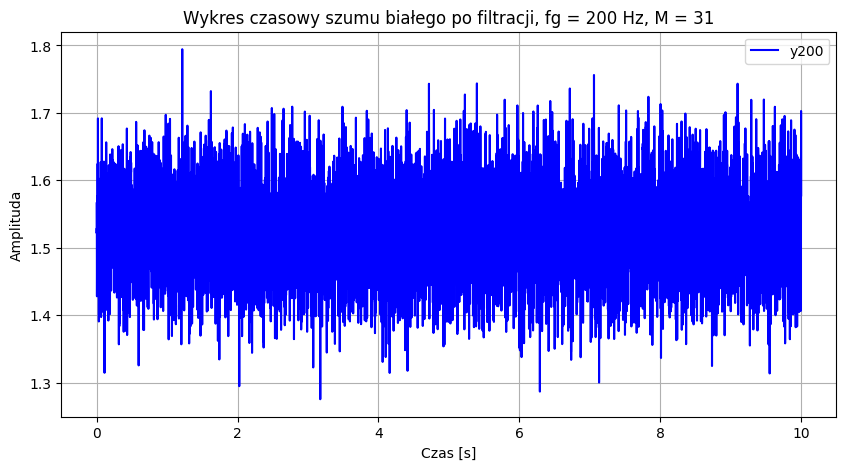

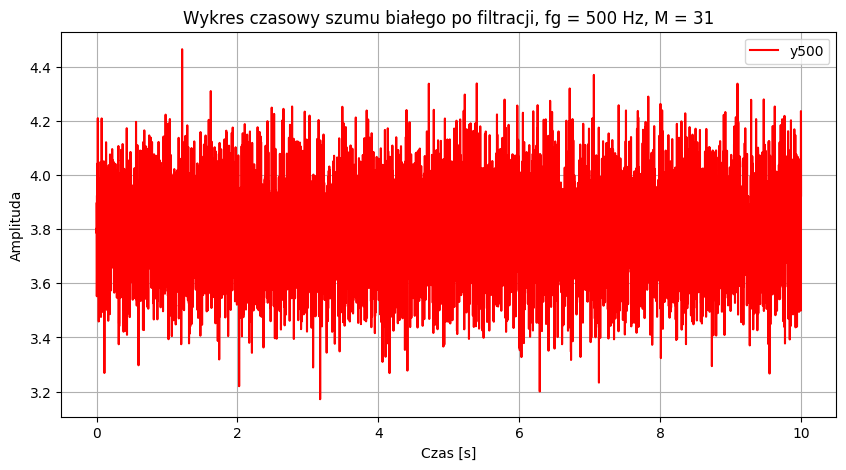

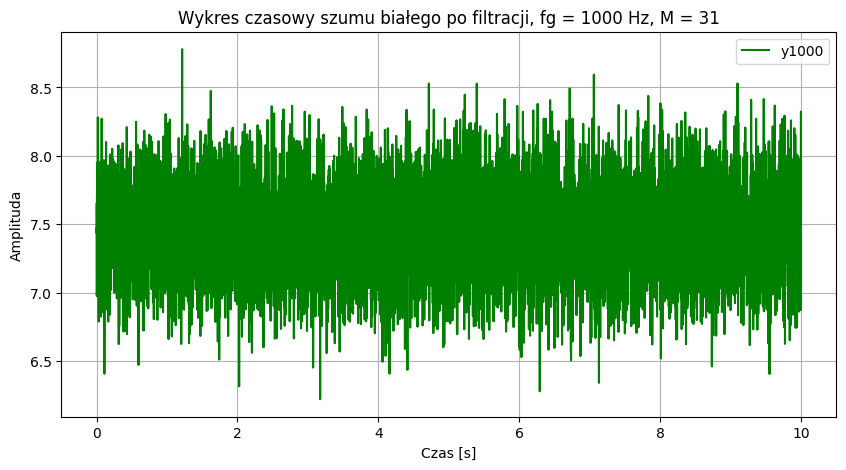

In [137]:
plt.figure(figsize=(10, 5))
plt.plot(czas, yn200, label="y200", color="blue")
plt.title(f'Wykres czasowy szumu białego po filtracji, fg = {fg_list[0]} Hz, M = {M}')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(czas, yn500, label="y500", color="red")
plt.title(f'Wykres czasowy szumu białego po filtracji, fg = {fg_list[1]} Hz, M = {M}')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(czas, yn1000, label="y1000", color="green")
plt.title(f'Wykres czasowy szumu białego po filtracji, fg = {fg_list[2]} Hz, M = {M}')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.legend()
plt.show()


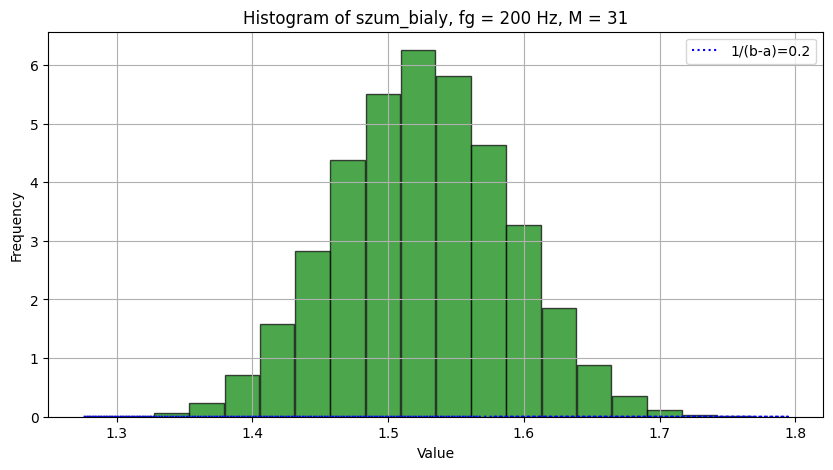

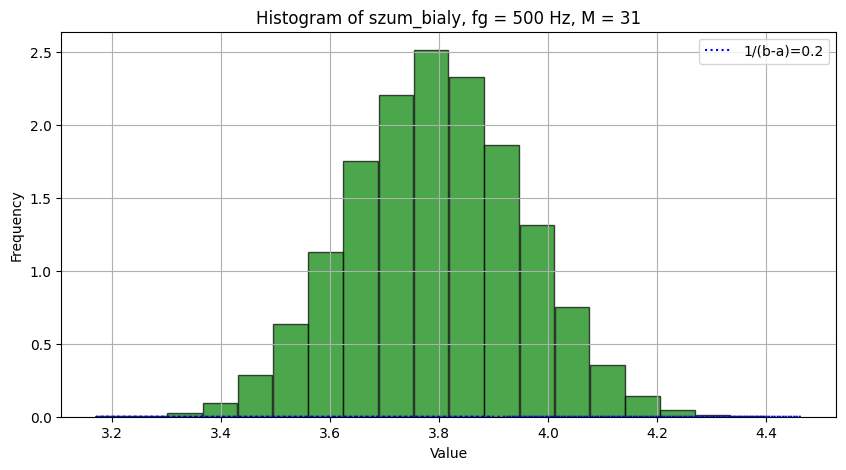

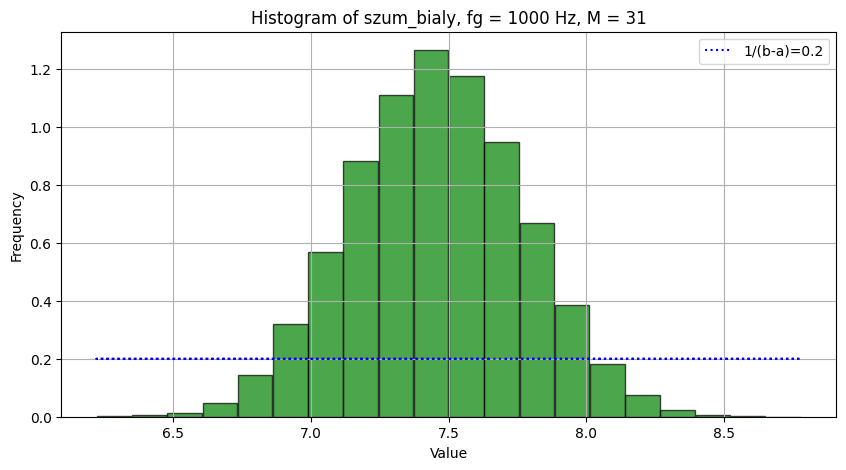

In [140]:
plt.figure(figsize=(10, 5))
x = np.linspace(ZAKRES[0], ZAKRES[1], 100)
plt.plot(yn200, uniform.pdf(yn200, loc=ZAKRES[0], scale=ZAKRES[1]-ZAKRES[0]), 'b', linestyle='dotted', label=f'1/(b-a)={1/(ZAKRES[1]-ZAKRES[0])}')
plt.hist(yn200, bins=20, density=True, rwidth=0.98, color='g', edgecolor='black', alpha=0.7)
plt.title(f'Histogram of szum_bialy, fg = {fg_list[0]} Hz, M = {M}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
x = np.linspace(ZAKRES[0], ZAKRES[1], 100)
plt.plot(yn500, uniform.pdf(yn500, loc=ZAKRES[0], scale=ZAKRES[1]-ZAKRES[0]), 'b', linestyle='dotted', label=f'1/(b-a)={1/(ZAKRES[1]-ZAKRES[0])}')
plt.hist(yn500, bins=20, density=True, rwidth=0.98, color='g', edgecolor='black', alpha=0.7)
plt.title(f'Histogram of szum_bialy, fg = {fg_list[1]} Hz, M = {M}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
x = np.linspace(ZAKRES[0], ZAKRES[1], 100)
plt.plot(yn1000, uniform.pdf(yn1000, loc=ZAKRES[0], scale=ZAKRES[1]-ZAKRES[0]), 'b', linestyle='dotted', label=f'1/(b-a)={1/(ZAKRES[1]-ZAKRES[0])}')
plt.hist(yn1000, bins=20, density=True, rwidth=0.98, color='g', edgecolor='black', alpha=0.7)
plt.title(f'Histogram of szum_bialy, fg = {fg_list[2]} Hz, M = {M}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [136]:

for fg in fg_list:
    tau0 = 1/(2*fg)
    print(f"Dla częstotliwości granicznej równej {fg}, tau0 wyniesie {tau0} sekundy")

print(f"Dla częstotliwości generowanego szumu białego o częstotliwości próbkowania {CZESTOTLIWOSC_PROBKOWANIA}, tau0 wyniesie 0.0001 sekundy")

Dla częstotliwości granicznej równej 200, tau0 wyniesie 0.0025 sekundy
Dla częstotliwości granicznej równej 500, tau0 wyniesie 0.001 sekundy
Dla częstotliwości granicznej równej 1000, tau0 wyniesie 0.0005 sekundy
Dla częstotliwości generowanego szumu białego o częstotliwości próbkowania 10000, tau0 wyniesie 0.0001 sekundy
